In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import zipfile

zip_file = zipfile.ZipFile('Downloads/smb.zip', 'r')  # 'r' = read mode
zip_file.extractall('/Downloads/smb')  # or any path you want to extract to
zip_file.close()

In [38]:
import os

print(os.getcwd())

C:\Users\HOME


In [39]:
zip_file = zipfile.ZipFile('Downloads/smb.zip')

In [40]:
data = pd.read_csv('Downloads/smb.zip')

In [41]:
data.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [43]:
data.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [44]:
data.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [45]:
data.duplicated().sum()

0

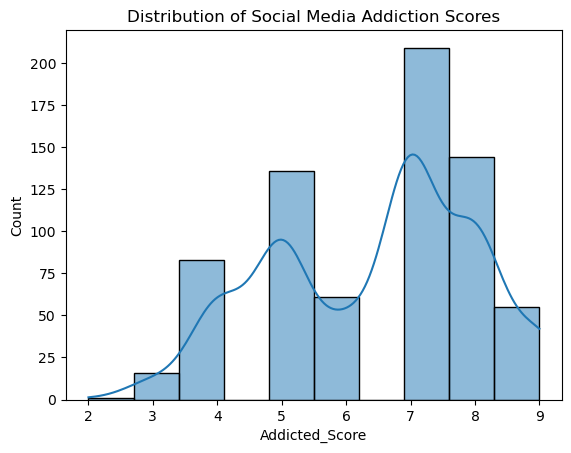

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Addicted_Score'], bins=10, kde=True)
plt.title('Distribution of Social Media Addiction Scores')
plt.show()

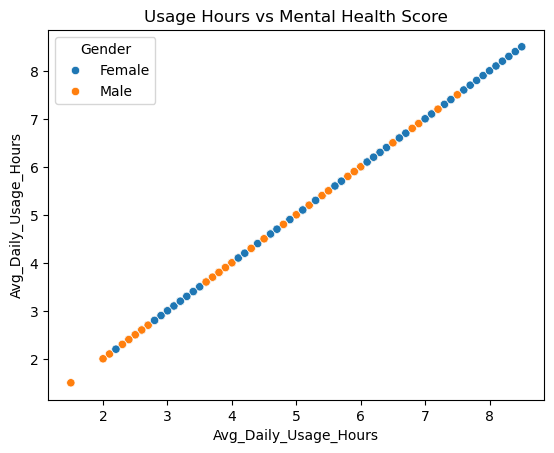

In [47]:
sns.scatterplot(data=data, x='Avg_Daily_Usage_Hours', y='Avg_Daily_Usage_Hours', hue='Gender')
plt.title('Usage Hours vs Mental Health Score')
plt.show()

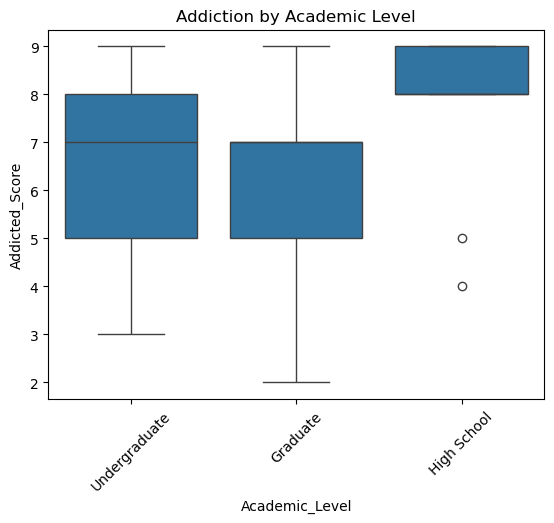

In [48]:
sns.boxplot(data=data, x='Academic_Level', y='Addicted_Score')
plt.title('Addiction by Academic Level')
plt.xticks(rotation=45)
plt.show()

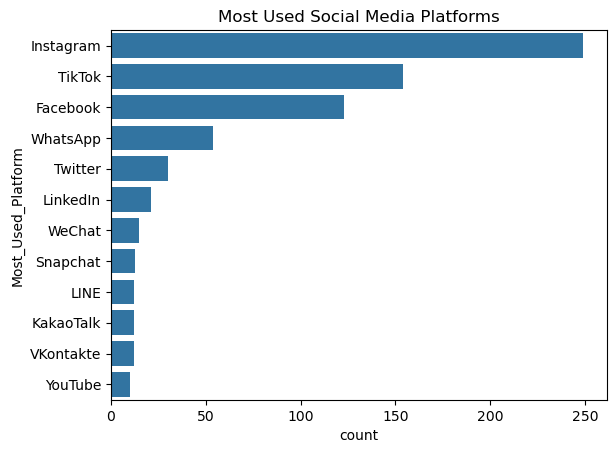

In [49]:
sns.countplot(data=data, y='Most_Used_Platform', order=data['Most_Used_Platform'].value_counts().index)
plt.title('Most Used Social Media Platforms')
plt.show()

In [50]:
import sqlite3

conn = sqlite3.connect(':memory:')
data.to_sql('social_media', conn, index=False, if_exists='replace')

705

In [51]:
query = '''
SELECT most_used_platform, COUNT(*) as users
FROM social_media
GROUP BY most_used_platform
ORDER BY users DESC
'''
pd.read_sql(query, conn)

,Most_Used_Platform,users
0,Instagram,249
1,TikTok,154
2,Facebook,123
3,WhatsApp,54
4,Twitter,30
5,LinkedIn,21
6,WeChat,15
7,Snapchat,13
8,VKontakte,12
9,LINE,12
